### Capstone Project

# Opening a Vegetarian Restaurant in Toronto

##### by Christine Brachthäuser


From the Open Data Portal of the City of Toronto the following table with data based on the 2016 Census of 140 Toronto neighborhoods is downloaded. 

In [1]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_6cb1bd1db7a943ccbd80661dd83649f1 = 'https://s3-api.us-geo.objectstorage.softlayer.net'
else:
    endpoint_6cb1bd1db7a943ccbd80661dd83649f1 = 'https://s3-api.us-geo.objectstorage.service.networklayer.com'

client_6cb1bd1db7a943ccbd80661dd83649f1 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='r4v08f1tiZAD_WU-g7TQsHCsUFknaHrFjUOu83cUGr75',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_6cb1bd1db7a943ccbd80661dd83649f1)

body = client_6cb1bd1db7a943ccbd80661dd83649f1.get_object(Bucket='courseracapstone-donotdelete-pr-ukcq33ldvta5e3',Key='neighbourhood-profiles-2016-csv.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,1,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,128,20,95,...,37,7,137,64,60,94,100,97,27,31
1,2,Neighbourhood Information,Neighbourhood Information,City of Toronto,TSNS2020 Designation,NaN,No Designation,No Designation,No Designation,No Designation,...,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,Emerging Neighbourhood
2,3,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2016","2,731,571","29,113","23,757","12,054","30,526",...,"16,936","22,156","53,485","12,541","7,865","14,349","11,817","12,528","27,593","14,804"
3,4,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2011","2,615,060","30,279","21,988","11,904","29,177",...,"15,004","21,343","53,350","11,703","7,826","13,986","10,578","11,652","27,713","14,687"
4,5,Population,Population and dwellings,Census Profile 98-316-X2016001,Population Change 2011-2016,4.50%,-3.90%,8.00%,1.30%,4.60%,...,12.90%,3.80%,0.30%,7.20%,0.50%,2.60%,11.70%,7.50%,-0.40%,0.80%


In [2]:
print('The table has {} rows in all.'.format(df_data_1.shape[0]))

The table has 2383 rows in all.


In [3]:
import json
import numpy as np

import csv


import requests
from pandas.io.json import json_normalize
from time import sleep

import matplotlib.pyplot as plt

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans 

#!conda install -c conda-forge folium=0.5.0 --yes
#import folium

print('Liberies imported.')


Liberies imported.


#### The census data dataframe is now reduced to basic neighborhood characteristics relevant for this project that can be directly extracted from the source table.


In [4]:
df_profiles = df_data_1.iloc[[2,4,1675,2290,2354],4:].copy()
df_profiles.drop(['City of Toronto'], axis=1, inplace=True)
df_profiles

,Characteristic,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
2,"Population, 2016","29,113","23,757","12,054","30,526","27,695","15,873","25,797","21,396","13,154",...,"16,936","22,156","53,485","12,541","7,865","14,349","11,817","12,528","27,593","14,804"
4,Population Change 2011-2016,-3.90%,8.00%,1.30%,4.60%,2.90%,2.80%,33.30%,21.10%,-2.80%,...,12.90%,3.80%,0.30%,7.20%,0.50%,2.60%,11.70%,7.50%,-0.40%,0.80%
1675,"Postsecondary certificate, diploma or degree",10985,10285,5300,20430,15950,8200,17505,13740,7470,...,10315,9935,21370,6620,3920,7230,7990,8820,11420,5240
2290,Private retirement income: Average amount ($),"18,482","18,200","18,562","42,918","29,704","18,528","37,712","32,763","28,249",...,"24,524","21,041","20,190","22,003","19,674","19,513","36,438","48,170","13,455","14,165"
2354,After-tax income: Average amount ($),"26,955","27,928","39,159","80,138","51,874","37,927","43,427","41,440","38,196",...,"36,093","36,713","27,341","44,594","39,565","43,054","65,356","80,555","26,651","32,904"


#### Cleaning up data for better use later on

In [5]:
# moving the percentage sign into the index 

df_profiles = df_profiles.replace(["Population Change 2011-2016"], "Population Change 2011-2016 (%)")

In [6]:
df_profiles = df_profiles.set_index('Characteristic')
df_profiles

,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
Characteristic,,,,,,,,,,,,,,,,,,,,,
"Population, 2016","29,113","23,757","12,054","30,526","27,695","15,873","25,797","21,396","13,154","23,236",...,"16,936","22,156","53,485","12,541","7,865","14,349","11,817","12,528","27,593","14,804"
Population Change 2011-2016 (%),-3.90%,8.00%,1.30%,4.60%,2.90%,2.80%,33.30%,21.10%,-2.80%,0.20%,...,12.90%,3.80%,0.30%,7.20%,0.50%,2.60%,11.70%,7.50%,-0.40%,0.80%
"Postsecondary certificate, diploma or degree",10985,10285,5300,20430,15950,8200,17505,13740,7470,12765,...,10315,9935,21370,6620,3920,7230,7990,8820,11420,5240
Private retirement income: Average amount ($),"18,482","18,200","18,562","42,918","29,704","18,528","37,712","32,763","28,249","37,101",...,"24,524","21,041","20,190","22,003","19,674","19,513","36,438","48,170","13,455","14,165"
After-tax income: Average amount ($),"26,955","27,928","39,159","80,138","51,874","37,927","43,427","41,440","38,196","85,678",...,"36,093","36,713","27,341","44,594","39,565","43,054","65,356","80,555","26,651","32,904"


In [7]:
# eliminating the commas and the percent signs from the table

df_profiles = df_profiles.apply(lambda x:x.str.replace(',','').str.replace('%',''))
df_profiles

,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
Characteristic,,,,,,,,,,,,,,,,,,,,,
"Population, 2016",29113,23757,12054,30526,27695,15873,25797,21396,13154,23236,...,16936,22156,53485,12541,7865,14349,11817,12528,27593,14804
Population Change 2011-2016 (%),-3.90,8.00,1.30,4.60,2.90,2.80,33.30,21.10,-2.80,0.20,...,12.90,3.80,0.30,7.20,0.50,2.60,11.70,7.50,-0.40,0.80
"Postsecondary certificate, diploma or degree",10985,10285,5300,20430,15950,8200,17505,13740,7470,12765,...,10315,9935,21370,6620,3920,7230,7990,8820,11420,5240
Private retirement income: Average amount ($),18482,18200,18562,42918,29704,18528,37712,32763,28249,37101,...,24524,21041,20190,22003,19674,19513,36438,48170,13455,14165
After-tax income: Average amount ($),26955,27928,39159,80138,51874,37927,43427,41440,38196,85678,...,36093,36713,27341,44594,39565,43054,65356,80555,26651,32904


In [8]:
# for convenience, the index names are shortened somewhat

df_profiles.index = ['Pop.', 'Pop. Change (%)', 'Higher Education', 'Average Retirement Income ($)', 'Average Income ($)']
df_profiles

,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
Pop.,29113,23757,12054,30526,27695,15873,25797,21396,13154,23236,...,16936,22156,53485,12541,7865,14349,11817,12528,27593,14804
Pop. Change (%),-3.90,8.00,1.30,4.60,2.90,2.80,33.30,21.10,-2.80,0.20,...,12.90,3.80,0.30,7.20,0.50,2.60,11.70,7.50,-0.40,0.80
Higher Education,10985,10285,5300,20430,15950,8200,17505,13740,7470,12765,...,10315,9935,21370,6620,3920,7230,7990,8820,11420,5240
Average Retirement Income ($),18482,18200,18562,42918,29704,18528,37712,32763,28249,37101,...,24524,21041,20190,22003,19674,19513,36438,48170,13455,14165
Average Income ($),26955,27928,39159,80138,51874,37927,43427,41440,38196,85678,...,36093,36713,27341,44594,39565,43054,65356,80555,26651,32904


In [9]:
# the neighborhoods are moved to the index column and the selected characteristics become regular columns

df_profiles_trans = df_profiles.transpose()
df_profiles_trans = df_profiles_trans.rename_axis('Neighborhood')
df_profiles_trans.head()

,Pop.,Pop. Change (%),Higher Education,Average Retirement Income ($),Average Income ($)
Neighborhood,,,,,
Agincourt North,29113,-3.90,10985,18482,26955
Agincourt South-Malvern West,23757,8.00,10285,18200,27928
Alderwood,12054,1.30,5300,18562,39159
Annex,30526,4.60,20430,42918,80138
Banbury-Don Mills,27695,2.90,15950,29704,51874


#### In addition to the absolute numbers of people with postsecondary education the respective percentage in regard to the overall population in each neighborhood is calculated and added to the table.

In [10]:
df_profiles_trans.dtypes

Pop.                             object
Pop. Change (%)                  object
Higher Education                 object
Average Retirement Income ($)    object
Average Income ($)               object
dtype: object

In [11]:
df_profiles_trans[['Pop.', 'Higher Education']] = df_profiles_trans[['Pop.', 'Higher Education']].astype(int)
df_profiles_trans['Pop. Change (%)'] = df_profiles_trans['Pop. Change (%)'].astype(float)


In [12]:
df_profiles_trans['Higher Education (%)'] = df_profiles_trans['Higher Education']/df_profiles_trans['Pop.']*100
df_profiles_trans['Higher Education (%)'] = np.round(df_profiles_trans['Higher Education (%)'], decimals=2)
df_profiles_trans.head()

,Pop.,Pop. Change (%),Higher Education,Average Retirement Income ($),Average Income ($),Higher Education (%)
Neighborhood,,,,,,
Agincourt North,29113,-3.9,10985,18482,26955,37.73
Agincourt South-Malvern West,23757,8.0,10285,18200,27928,43.29
Alderwood,12054,1.3,5300,18562,39159,43.97
Annex,30526,4.6,20430,42918,80138,66.93
Banbury-Don Mills,27695,2.9,15950,29704,51874,57.59


In [13]:
# changing the order of columns for better readability

#df_profiles_trans.columns = [['Population, 2016','Population Change (%)','Higher Education','Higher Education (%)','Average Income ($)','Average Retirement Income ($)']]
#df_profiles_trans.head()

columns_names = ['Pop.','Pop. Change (%)','Higher Education','Higher Education (%)','Average Income ($)','Average Retirement Income ($)']

df_profiles_trans = df_profiles_trans.reindex(columns = columns_names)

df_profiles_trans.head()


,Pop.,Pop. Change (%),Higher Education,Higher Education (%),Average Income ($),Average Retirement Income ($)
Neighborhood,,,,,,
Agincourt North,29113,-3.9,10985,37.73,26955,18482
Agincourt South-Malvern West,23757,8.0,10285,43.29,27928,18200
Alderwood,12054,1.3,5300,43.97,39159,18562
Annex,30526,4.6,20430,66.93,80138,42918
Banbury-Don Mills,27695,2.9,15950,57.59,51874,29704


### Middle and higher incomes

So far only average income is considered. For a more differentiated picture, the number of people with a personal after-tax income above $30000 #### and the percentage they represent in regard to all after-tax income earners is now calculated so that they can be added to the table later on. 


In [14]:
df_profiles_income = df_data_1.iloc[986:997, 4:].copy()

df_profiles_income.drop([987], axis=0, inplace=True)
df_profiles_income.drop(['City of Toronto'], axis=1, inplace=True)
df_profiles_income = df_profiles_income.set_index('Characteristic')
df_profiles_income

,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
Characteristic,,,,,,,,,,,,,,,,,,,,,
With after-tax income,"23,640","19,295","9,925","25,675","22,400","12,680","22,900","17,755","10,580","17,685",...,"14,265","17,755","40,655","9,760","6,470","11,005","9,595","10,905","22,275","11,465"
"Under $10,000 (including loss)","5,225","4,590","1,395","3,995","3,320","2,160","7,090","3,890","2,215","2,480",...,"3,460","2,720","8,955","1,320",885,"1,670","1,325","1,275","5,135","1,875"
"$10,000 to $19,999","6,475","4,640","1,565","3,790","3,265","2,570","2,995","2,805","1,985","2,140",...,"2,625","3,200","9,640","1,715","1,200","2,170","1,135","1,185","5,000","2,260"
"$20,000 to $29,999","3,945","3,075","1,590","2,955","2,725","2,030","2,180","2,155","1,425","2,050",...,"1,660","2,940","7,245","1,245",910,"1,750","1,060","1,125","4,030","2,165"
"$30,000 to $39,999","2,780","2,270","1,325","2,590","2,450","1,545","1,965","1,805","1,085","1,635",...,"1,390","2,355","5,250",970,730,"1,205","1,045","1,170","3,085","1,710"
"$40,000 to $49,999","2,005","1,665","1,170","2,370","2,360","1,200","1,730","1,700",915,"1,350",...,"1,160","1,990","3,805",930,680,"1,040",985,"1,140","2,215","1,225"
"$50,000 to $59,999","1,220","1,150",930,"1,930","1,905",895,"1,565","1,400",730,"1,125",...,945,"1,435","2,365",805,600,830,800,990,"1,235",755
"$60,000 to $69,999",745,695,625,"1,630","1,550",675,"1,545","1,110",580,935,...,825,950,"1,445",700,475,580,650,740,725,470
"$70,000 to $79,999",525,500,510,"1,215","1,135",470,"1,125",860,455,810,...,655,780,830,635,380,445,500,610,375,390


In [15]:
df_profiles_income.dtypes


Agincourt North                 object
Agincourt South-Malvern West    object
Alderwood                       object
Annex                           object
Banbury-Don Mills               object
                                 ...  
Wychwood                        object
Yonge-Eglinton                  object
Yonge-St.Clair                  object
York University Heights         object
Yorkdale-Glen Park              object
Length: 140, dtype: object

In [16]:
df_profiles_income = df_profiles_income.apply(lambda x:x.str.replace(',',''))


In [17]:
df_profiles_income = df_profiles_income.astype(int)

In [18]:
df_profiles_income 

,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
Characteristic,,,,,,,,,,,,,,,,,,,,,
With after-tax income,23640,19295,9925,25675,22400,12680,22900,17755,10580,17685,...,14265,17755,40655,9760,6470,11005,9595,10905,22275,11465
"Under $10,000 (including loss)",5225,4590,1395,3995,3320,2160,7090,3890,2215,2480,...,3460,2720,8955,1320,885,1670,1325,1275,5135,1875
"$10,000 to $19,999",6475,4640,1565,3790,3265,2570,2995,2805,1985,2140,...,2625,3200,9640,1715,1200,2170,1135,1185,5000,2260
"$20,000 to $29,999",3945,3075,1590,2955,2725,2030,2180,2155,1425,2050,...,1660,2940,7245,1245,910,1750,1060,1125,4030,2165
"$30,000 to $39,999",2780,2270,1325,2590,2450,1545,1965,1805,1085,1635,...,1390,2355,5250,970,730,1205,1045,1170,3085,1710
"$40,000 to $49,999",2005,1665,1170,2370,2360,1200,1730,1700,915,1350,...,1160,1990,3805,930,680,1040,985,1140,2215,1225
"$50,000 to $59,999",1220,1150,930,1930,1905,895,1565,1400,730,1125,...,945,1435,2365,805,600,830,800,990,1235,755
"$60,000 to $69,999",745,695,625,1630,1550,675,1545,1110,580,935,...,825,950,1445,700,475,580,650,740,725,470
"$70,000 to $79,999",525,500,510,1215,1135,470,1125,860,455,810,...,655,780,830,635,380,445,500,610,375,390


In [38]:
# summing up the number of people with individual incomes above $30000 in each neighborhood

df_higher_incomes = pd.DataFrame(df_profiles_income.iloc[4:].sum(axis=0), columns = ['Incomes above $30000'])
df_higher_incomes.head()

,Incomes above $30000
Agincourt North,7995
Agincourt South-Malvern West,6990
Alderwood,5390
Annex,14935
Banbury-Don Mills,13075


In [39]:
df_income_percent = df_profiles_income
df_income_percent = df_income_percent.div(df_income_percent.iloc[0], axis=1)
df_income_percent = np.round(df_income_percent, decimals = 2)
df_income_percent.head()

,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
Characteristic,,,,,,,,,,,,,,,,,,,,,
With after-tax income,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
"Under $10,000 (including loss)",0.22,0.24,0.14,0.16,0.15,0.17,0.31,0.22,0.21,0.14,...,0.24,0.15,0.22,0.14,0.14,0.15,0.14,0.12,0.23,0.16
"$10,000 to $19,999",0.27,0.24,0.16,0.15,0.15,0.20,0.13,0.16,0.19,0.12,...,0.18,0.18,0.24,0.18,0.19,0.20,0.12,0.11,0.22,0.20
"$20,000 to $29,999",0.17,0.16,0.16,0.12,0.12,0.16,0.10,0.12,0.13,0.12,...,0.12,0.17,0.18,0.13,0.14,0.16,0.11,0.10,0.18,0.19
"$30,000 to $39,999",0.12,0.12,0.13,0.10,0.11,0.12,0.09,0.10,0.10,0.09,...,0.10,0.13,0.13,0.10,0.11,0.11,0.11,0.11,0.14,0.15


In [40]:
# summing up the share of people with individual incomes above $30000

df_higher_incomes_percent = pd.DataFrame(df_income_percent.iloc[4:].sum(axis=0)*100, columns = ['Incomes above $30000 (%)'])
df_higher_incomes_percent.head()

,Incomes above $30000 (%)
Agincourt North,33.0
Agincourt South-Malvern West,38.0
Alderwood,53.0
Annex,58.0
Banbury-Don Mills,59.0


### Middle age population

The number of people between 30 and 75 years as well as the share of the overall population they represent is now calculated. 

In [28]:
df_profiles_age = df_data_1.iloc[15:57, 4:].copy()
df_profiles_age.drop(['City of Toronto'], axis=1, inplace = True)
df_profiles_age


,Characteristic,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
15,Male: 0 to 04 years,660,575,360,445,570,435,470,455,205,...,355,620,1625,460,225,325,300,220,755,320
16,Male: 05 to 09 years,695,540,270,365,660,355,230,395,260,...,310,625,1705,400,180,350,305,220,685,315
17,Male: 10 to 14 years,660,460,225,325,675,415,130,410,320,...,265,610,1600,330,180,310,280,195,635,370
18,Male: 15 to 19 years,840,780,285,465,715,490,585,520,385,...,415,680,1815,275,160,260,255,145,900,485
19,Male: 20 to 24 years,1015,1000,355,1215,700,530,2485,735,445,...,705,705,2310,255,200,385,345,260,1615,500
20,Male: 25 to 29 years,1015,1045,355,2080,645,465,2115,1075,405,...,790,655,2010,335,235,595,530,630,1545,465
21,Male: 30 to 34 years,835,820,410,1610,735,485,1695,1040,285,...,780,570,1730,510,315,620,605,620,1105,425
22,Male: 35 to 39 years,680,625,455,1055,735,580,1010,805,230,...,555,590,1585,565,340,535,450,410,875,430
23,Male: 40 to 44 years,760,610,420,835,815,435,560,685,310,...,530,605,1585,545,295,425,395,365,775,395
24,Male: 45 to 49 years,890,760,440,850,1010,535,500,605,390,...,470,745,1675,505,300,480,390,405,775,505


In [29]:
# the following rearrangement is necessary since row 31 is misplaced in the source table;

df_profiles_age = df_profiles_age.reindex([15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,32,33,34,35,36,37,38,31,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56])
df_profiles_age = df_profiles_age.reset_index()
df_profiles_age


,index,Characteristic,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,15,Male: 0 to 04 years,660,575,360,445,570,435,470,455,...,355,620,1625,460,225,325,300,220,755,320
1,16,Male: 05 to 09 years,695,540,270,365,660,355,230,395,...,310,625,1705,400,180,350,305,220,685,315
2,17,Male: 10 to 14 years,660,460,225,325,675,415,130,410,...,265,610,1600,330,180,310,280,195,635,370
3,18,Male: 15 to 19 years,840,780,285,465,715,490,585,520,...,415,680,1815,275,160,260,255,145,900,485
4,19,Male: 20 to 24 years,1015,1000,355,1215,700,530,2485,735,...,705,705,2310,255,200,385,345,260,1615,500
5,20,Male: 25 to 29 years,1015,1045,355,2080,645,465,2115,1075,...,790,655,2010,335,235,595,530,630,1545,465
6,21,Male: 30 to 34 years,835,820,410,1610,735,485,1695,1040,...,780,570,1730,510,315,620,605,620,1105,425
7,22,Male: 35 to 39 years,680,625,455,1055,735,580,1010,805,...,555,590,1585,565,340,535,450,410,875,430
8,23,Male: 40 to 44 years,760,610,420,835,815,435,560,685,...,530,605,1585,545,295,425,395,365,775,395
9,24,Male: 45 to 49 years,890,760,440,850,1010,535,500,605,...,470,745,1675,505,300,480,390,405,775,505


In [30]:
df_age_men = df_profiles_age.iloc[0:21].copy()
df_age_men.drop(['index'], axis=1, inplace=True)
df_age_men.head()

,Characteristic,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,Male: 0 to 04 years,660,575,360,445,570,435,470,455,205,...,355,620,1625,460,225,325,300,220,755,320
1,Male: 05 to 09 years,695,540,270,365,660,355,230,395,260,...,310,625,1705,400,180,350,305,220,685,315
2,Male: 10 to 14 years,660,460,225,325,675,415,130,410,320,...,265,610,1600,330,180,310,280,195,635,370
3,Male: 15 to 19 years,840,780,285,465,715,490,585,520,385,...,415,680,1815,275,160,260,255,145,900,485
4,Male: 20 to 24 years,1015,1000,355,1215,700,530,2485,735,445,...,705,705,2310,255,200,385,345,260,1615,500


In [31]:
df_age_women = df_profiles_age.iloc[21:42].copy()
df_age_women.drop(['index'], axis=1, inplace=True)
df_age_women.head()

,Characteristic,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
21,Female: 0 to 04 years,620,530,320,480,500,400,500,405,185,...,340,545,1530,445,240,305,300,230,680,285
22,Female: 05 to 09 years,620,495,325,400,600,365,235,405,265,...,290,605,1650,420,190,315,325,200,660,325
23,Female: 10 to 14 years,595,475,255,355,600,330,105,350,270,...,235,545,1545,275,155,255,300,155,615,345
24,Female: 15 to 19 years,865,690,290,550,660,405,790,425,365,...,400,590,1575,260,135,250,245,165,855,430
25,Female: 20 to 24 years,975,895,310,1520,650,510,3005,815,435,...,705,650,1970,255,175,425,380,350,1395,455


#### Men and women are now merged to one common age group.

In [32]:
df_age_men_list = df_age_men['Characteristic'].tolist()
df_age_men_list = [s.strip('Male:') for s in df_age_men_list]
df_age_men_list = [s.replace('Male:','') for s in df_age_men_list]

df_age_women_list = df_age_women['Characteristic'].tolist()
df_age_women_list = [s.strip('Female:') for s in df_age_women_list]
df_age_women_list = [s.replace('Female:','') for s in df_age_women_list]


In [33]:
df_age_men['Characteristic'] = df_age_men_list
df_age_women['Characteristic'] = df_age_women_list

In [34]:
df_age_men = df_age_men.set_index(['Characteristic'])
df_age_men = df_age_men.astype(int)
df_age_men.head()

,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
Characteristic,,,,,,,,,,,,,,,,,,,,,
0 to 04 years,660,575,360,445,570,435,470,455,205,675,...,355,620,1625,460,225,325,300,220,755,320
05 to 09 years,695,540,270,365,660,355,230,395,260,795,...,310,625,1705,400,180,350,305,220,685,315
10 to 14 years,660,460,225,325,675,415,130,410,320,880,...,265,610,1600,330,180,310,280,195,635,370
15 to 19 years,840,780,285,465,715,490,585,520,385,880,...,415,680,1815,275,160,260,255,145,900,485
20 to 24 years,1015,1000,355,1215,700,530,2485,735,445,765,...,705,705,2310,255,200,385,345,260,1615,500


In [35]:
df_age_women = df_age_women.set_index(['Characteristic'])
df_age_women = df_age_women.astype(int)
df_age_women.head()

,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
Characteristic,,,,,,,,,,,,,,,,,,,,,
0 to 04 years,620,530,320,480,500,400,500,405,185,605,...,340,545,1530,445,240,305,300,230,680,285
05 to 09 years,620,495,325,400,600,365,235,405,265,780,...,290,605,1650,420,190,315,325,200,660,325
10 to 14 years,595,475,255,355,600,330,105,350,270,820,...,235,545,1545,275,155,255,300,155,615,345
15 to 19 years,865,690,290,550,660,405,790,425,365,840,...,400,590,1575,260,135,250,245,165,855,430
20 to 24 years,975,895,310,1520,650,510,3005,815,435,725,...,705,650,1970,255,175,425,380,350,1395,455


In [49]:
# the targeted age group is now reduced to the 30 to 70 year-olds. 

middle_age_men = df_age_men.iloc[6:14].copy()
middle_age_women = df_age_women.iloc[6:14].copy()


In [50]:
middle_age_men = middle_age_men.astype(int)
middle_age_women = middle_age_women.astype(int)

In [51]:
middle_age_men.head(2)

,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
Characteristic,,,,,,,,,,,,,,,,,,,,,
30 to 34 years,835,820,410,1610,735,485,1695,1040,285,450,...,780,570,1730,510,315,620,605,620,1105,425
35 to 39 years,680,625,455,1055,735,580,1010,805,230,590,...,555,590,1585,565,340,535,450,410,875,430


In [52]:
middle_age_women.head(2)

,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
Characteristic,,,,,,,,,,,,,,,,,,,,,
30 to 34 years,935,835,430,1675,860,575,1645,1170,285,645,...,755,670,2015,560,330,620,575,695,1110,495
35 to 39 years,775,715,450,1040,895,615,825,860,310,785,...,590,705,1900,600,390,510,520,440,970,480


In [53]:
df_middle_age = middle_age_men + middle_age_women
df_middle_age

,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
Characteristic,,,,,,,,,,,,,,,,,,,,,
30 to 34 years,1770,1655,840,3285,1595,1060,3340,2210,570,1095,...,1535,1240,3745,1070,645,1240,1180,1315,2215,920
35 to 39 years,1455,1340,905,2095,1630,1195,1835,1665,540,1375,...,1145,1295,3485,1165,730,1045,970,850,1845,910
40 to 44 years,1670,1355,865,1750,1790,1010,1090,1445,695,1500,...,1040,1285,3365,1140,630,930,850,785,1645,885
45 to 49 years,1950,1645,870,1705,2180,1185,1055,1385,925,1745,...,1015,1500,3525,1045,620,1015,835,830,1730,1075
50 to 54 years,2450,1945,1030,1855,2225,1235,1205,1370,950,1830,...,1110,1595,3725,1035,675,925,805,790,2035,1075
55 to 59 years,2225,1765,1025,1770,1935,1170,975,1335,975,1675,...,1055,1605,3490,890,615,790,645,735,1745,985
60 to 64 years,1995,1505,790,1695,1625,855,800,1215,850,1400,...,1020,1300,2755,740,530,815,675,795,1225,835
65 to 69 years,1910,1320,625,1730,1670,795,740,1060,925,1220,...,920,1245,2235,505,385,700,595,820,1050,720


In [54]:
df_age = pd.DataFrame(df_middle_age.sum(axis=0), columns=['Pop. 30-70 years'])
df_age.head()

,Pop. 30-70 years
Agincourt North,15425
Agincourt South-Malvern West,12530
Alderwood,6950
Annex,15885
Banbury-Don Mills,14650


In [55]:
# now the share of the 30-70-year-olds is calculated

df_age_percent = df_middle_age
df_age_percent = df_age_percent.append(df_profiles.iloc[0])
df_age_percent

,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
Characteristic,,,,,,,,,,,,,,,,,,,,,
30 to 34 years,1770,1655,840,3285,1595,1060,3340,2210,570,1095,...,1535,1240,3745,1070,645,1240,1180,1315,2215,920
35 to 39 years,1455,1340,905,2095,1630,1195,1835,1665,540,1375,...,1145,1295,3485,1165,730,1045,970,850,1845,910
40 to 44 years,1670,1355,865,1750,1790,1010,1090,1445,695,1500,...,1040,1285,3365,1140,630,930,850,785,1645,885
45 to 49 years,1950,1645,870,1705,2180,1185,1055,1385,925,1745,...,1015,1500,3525,1045,620,1015,835,830,1730,1075
50 to 54 years,2450,1945,1030,1855,2225,1235,1205,1370,950,1830,...,1110,1595,3725,1035,675,925,805,790,2035,1075
55 to 59 years,2225,1765,1025,1770,1935,1170,975,1335,975,1675,...,1055,1605,3490,890,615,790,645,735,1745,985
60 to 64 years,1995,1505,790,1695,1625,855,800,1215,850,1400,...,1020,1300,2755,740,530,815,675,795,1225,835
65 to 69 years,1910,1320,625,1730,1670,795,740,1060,925,1220,...,920,1245,2235,505,385,700,595,820,1050,720
Pop.,29113,23757,12054,30526,27695,15873,25797,21396,13154,23236,...,16936,22156,53485,12541,7865,14349,11817,12528,27593,14804


In [56]:
df_age_percent = df_age_percent.astype(int)
df_age_percent = df_age_percent.div(df_age_percent.loc['Pop.'])
df_age_percent = np.round(df_age_percent, decimals = 2)
df_age_percent.drop(['Pop.'], axis=0, inplace=True)

In [57]:
df_age_p = pd.DataFrame(df_age_percent.sum(axis=0)*100, columns=['Pop. 30-70 years (%)'])
df_age_p.head()

,Pop. 30-70 years (%)
Agincourt North,54.0
Agincourt South-Malvern West,53.0
Alderwood,59.0
Annex,54.0
Banbury-Don Mills,53.0


### Latitude and longitude coordinates for all neighborhoods

In [58]:
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

print('Geocoder imported')

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.7-main

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |      conda_forge           3 KB  conda-forge
    _openmp_mutex-4.5          |           1_llvm           5 KB  conda-forge
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB  conda-forge
    _pytorch_select-0.2        |            gpu_0           2 KB
    absl-py-0.13.0             |     pyhd8ed1ab_0          97 KB  conda-forge
    aiohttp-3.7.4.post0        |   py37h5e8e339_0         

pyrsistent-0.17.3    | 89 KB     | ##################################### | 100% 
pyodbc-4.0.30        | 71 KB     | ##################################### | 100% 
py-1.10.0            | 73 KB     | ##################################### | 100% 
freetype-2.10.4      | 890 KB    | ##################################### | 100% 
traitlets-5.0.5      | 81 KB     | ##################################### | 100% 
statsmodels-0.12.2   | 11.3 MB   | ##################################### | 100% 
pyzmq-22.1.0         | 500 KB    | ##################################### | 100% 
keyring-18.0.0       | 50 KB     | ##################################### | 100% 
pluggy-0.13.1        | 29 KB     | ##################################### | 100% 
libaec-1.0.5         | 46 KB     | ##################################### | 100% 
yarl-1.6.3           | 141 KB    | ##################################### | 100% 
ld_impl_linux-64-2.3 | 670 KB    | ##################################### | 100% 
snappy-1.1.8         | 32 KB

greenlet-1.1.0       | 83 KB     | ##################################### | 100% 
libcurl-7.77.0       | 334 KB    | ##################################### | 100% 
cached-property-1.5. | 4 KB      | ##################################### | 100% 
s3transfer-0.4.2     | 55 KB     | ##################################### | 100% 
mock-4.0.3           | 51 KB     | ##################################### | 100% 
google-pasta-0.2.0   | 42 KB     | ##################################### | 100% 
gettext-0.19.8.1     | 3.6 MB    | ##################################### | 100% 
expat-2.4.1          | 182 KB    | ##################################### | 100% 
snowballstemmer-2.1. | 57 KB     | ##################################### | 100% 
lxml-4.6.3           | 1.5 MB    | ##################################### | 100% 
geopy-2.1.0          | 64 KB     | ##################################### | 100% 
tornado-6.1          | 646 KB    | ##################################### | 100% 
seaborn-base-0.11.1  | 217 K

In [59]:
!pip install geocoder
import geocoder

     |████████████████████████████████| 98 kB 8.3 MB/s  eta 0:00:01


In [60]:
neighborhoods = df_profiles.columns.tolist()
#neighborhoods

In [61]:
def get_latlng(neighborhoods_1):

    lat_lng_coords = None

    while (lat_lng_coords is None):
        g = geocoder.arcgis('{}, Toronto, Ontario'.format(neighborhoods_1))
        lat_lng_coords = g.latlng
        
    return lat_lng_coords

print('The latitude of Agincourt North is {} and the longitude is {}.'.format(get_latlng('Agincourt North')[0], get_latlng('Agincourt North')[1]))


The latitude of Agincourt North is 43.809300000000064 and the longitude is -79.26706999999999.


In [62]:
latitudes = [get_latlng(neighborhoods)[0] for neighborhoods in neighborhoods]
sleep(1)

longitudes = [get_latlng(neighborhoods)[1] for neighborhoods in neighborhoods]
sleep(1)


In [64]:
columns = ['Neighborhood', 'Latitude', 'Longitude']
df_geodata = pd.DataFrame(columns = columns)
df_geodata['Neighborhood'] = neighborhoods
df_geodata['Latitude'] = latitudes
df_geodata['Longitude'] = longitudes
df_geodata.head()
    

,Neighborhood,Latitude,Longitude
0,Agincourt North,43.80930,-79.26707
1,Agincourt South-Malvern West,43.78736,-79.26935
2,Alderwood,43.60496,-79.54116
3,Annex,43.66936,-79.40280
4,Banbury-Don Mills,43.74041,-79.34852


In [66]:
df_geodata.shape

(140, 3)

## Venue search with the Foursquare database

In [67]:
CLIENT_ID = 'DHR44SDFIOFZWMVRIVWQFKNYLQHHPGTUN43UJPA5JNHFL0CT'
CLIENT_SECRET = 'QFCZXAPZBW1Q4ERFP1P3SCVC0QXLKAU33J00X0DNRZ5WXGFO'
VERSION = '20180605'

print('Your Credentials:')
print('CLIENT_ID:' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your Credentials:
CLIENT_ID:DHR44SDFIOFZWMVRIVWQFKNYLQHHPGTUN43UJPA5JNHFL0CT
CLIENT_SECRET:QFCZXAPZBW1Q4ERFP1P3SCVC0QXLKAU33J00X0DNRZ5WXGFO


In [68]:
address = 'Toronto, ON'
geolocator = Nominatim(user_agent = "toronto_explorer")
location = geolocator.geocode(address)
tor_latitude = location.latitude
tor_longitude = location.longitude
print('The geographical coordinates of Toronto are {}, {}.'.format(tor_latitude, tor_longitude))


The geographical coordinates of Toronto are 43.6534817, -79.3839347.


#### Search for vegetarian restaurants in Toronto as a whole with a radius of 20000.


In [69]:
urlvegy = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius=20000&limit=1000&query=vegetarian / vegan restaurant'.format(
CLIENT_ID,CLIENT_SECRET,VERSION,tor_latitude,tor_longitude)

urlvegy

'https://api.foursquare.com/v2/venues/explore?&client_id=DHR44SDFIOFZWMVRIVWQFKNYLQHHPGTUN43UJPA5JNHFL0CT&client_secret=QFCZXAPZBW1Q4ERFP1P3SCVC0QXLKAU33J00X0DNRZ5WXGFO&v=20180605&ll=43.6534817,-79.3839347&radius=20000&limit=1000&query=vegetarian / vegan restaurant'

In [70]:
resultsvegy = requests.get(urlvegy).json()

In [71]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [72]:
venues = resultsvegy['response']['groups'][0]['items']
vegy = pd.json_normalize(venues)
filtered_columns = ['venue.name','venue.categories','venue.location.lat','venue.location.lng','venue.location.address']
vegy['categories'] = vegy.apply(get_category_type, axis=1)
vegy.columns = [col.split(".")[-1] for col in vegy.columns]
vegy_restaurants = vegy[['name','categories','lat','lng','address']].copy()
vegy_restaurants.head()

,name,categories,categories,lat,lng,address
0,Fresh On Front,"[{'id': '4bf58dd8d48988d1d3941735', 'name': 'V...",Vegetarian / Vegan Restaurant,43.647815,-79.374453,47 Front Street E
1,Vegetarian Haven,"[{'id': '4bf58dd8d48988d1d3941735', 'name': 'V...",Vegetarian / Vegan Restaurant,43.656016,-79.392758,17 Baldwin St
2,Hibiscus,"[{'id': '4bf58dd8d48988d1d3941735', 'name': 'V...",Vegetarian / Vegan Restaurant,43.655454,-79.402439,238 Augusta Ave
3,Urban Herbivore,"[{'id': '4bf58dd8d48988d1d3941735', 'name': 'V...",Vegetarian / Vegan Restaurant,43.656193,-79.402673,64 Oxford St
4,One Love Vegetarian,"[{'id': '4bf58dd8d48988d1d3941735', 'name': 'V...",Vegetarian / Vegan Restaurant,43.666588,-79.411777,854 Bathurst Street


In [73]:
print('The search revealed that in total there are {} vegetarian restaurants in Toronto.'.format(vegy_restaurants.shape[0]))

The search revealed that in total there are 94 vegetarian restaurants in Toronto.


In [74]:
# search for vegetarian restaurants in the higher prices segments

urlvegy3 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius=20000&limit=1000&query=vegetarian / vegan restaurant&price=3,4'.format(
CLIENT_ID,CLIENT_SECRET,VERSION,tor_latitude,tor_longitude)

urlvegy3

'https://api.foursquare.com/v2/venues/explore?&client_id=DHR44SDFIOFZWMVRIVWQFKNYLQHHPGTUN43UJPA5JNHFL0CT&client_secret=QFCZXAPZBW1Q4ERFP1P3SCVC0QXLKAU33J00X0DNRZ5WXGFO&v=20180605&ll=43.6534817,-79.3839347&radius=20000&limit=1000&query=vegetarian / vegan restaurant&price=3,4'

In [75]:
resultsvegy3 = requests.get(urlvegy3).json()
#resultsvegy

In [76]:
venues3 = resultsvegy3['response']['groups'][0]['items']
vegy3 = pd.json_normalize(venues3)
filtered_columns = ['venue.name','venue.categories','venue.location.lat','venue.location.lng','venue.location.address']
vegy3['categories'] = vegy3.apply(get_category_type, axis=1)
vegy3.columns = [col.split(".")[-1] for col in vegy3.columns]
vegy3_restaurants = vegy3[['name','categories','lat','lng','address']].copy()
vegy3_restaurants

,name,categories,categories,lat,lng,address
0,Planta Yorkville,"[{'id': '4bf58dd8d48988d1d3941735', 'name': 'V...",Vegetarian / Vegan Restaurant,43.670213,-79.389512,1221 Bay Street
1,Anglr,"[{'id': '4bf58dd8d48988d1d3941735', 'name': 'V...",Vegetarian / Vegan Restaurant,43.669296,-79.336106,"1054 1/2, Gerrard St E"
2,Gourmet Malaysia 膳園,"[{'id': '4bf58dd8d48988d1d3941735', 'name': 'V...",Vegetarian / Vegan Restaurant,43.788118,-79.266678,4466 Sheppard Ave. E Unit 101


In [77]:
vegy_gourmet = vegy3_restaurants.iloc[:,[0,2,3,4,5]]
vegy_gourmet

,name,categories,lat,lng,address
0,Planta Yorkville,Vegetarian / Vegan Restaurant,43.670213,-79.389512,1221 Bay Street
1,Anglr,Vegetarian / Vegan Restaurant,43.669296,-79.336106,"1054 1/2, Gerrard St E"
2,Gourmet Malaysia 膳園,Vegetarian / Vegan Restaurant,43.788118,-79.266678,4466 Sheppard Ave. E Unit 101


In [78]:
print('It turns out that only {} vegetarian restaurants fall into the upper price category.'.format(vegy_gourmet.shape[0]))

It turns out that only 3 vegetarian restaurants fall into the upper price category.


### Venue Search

The following venue search is conducted in regard to the individual neighborhoods to determine how well a vegetarian gourmet restaurant would fit in there. The radius is set to 1500, which seems to be sufficient to get a general impression of the business structure in each neighborhood.
The venue search is done in several stages. A first inquiry refers to venues generally. The result in form of a json file is converted to a pandas dataframe, which serves as source table for further analysis where specific venue categories are then examined to determine to what extent they are represented in each neighborhood. 

In [79]:
# I need to change radius and limit;

def getNearbyVenues(names, latitudes, longitudes, radius=1500, LIMIT=1000):
    
    venues_list = []
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        
        urlvenue = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
                    CLIENT_ID,CLIENT_SECRET,VERSION,lat,lng,radius,LIMIT)
        
        results = requests.get(urlvenue).json()['response']['groups'][0]['items']
        
        venues_list.append([(
            name,
            lat,
            lng,
            v['venue']['name'],
            v['venue']['location']['lat'],
            v['venue']['location']['lng'],
            v['venue']['categories'][0]['name']) for v in results])
    
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood','Neighborhood Latitude','Neighborhood Longitude','Venue','Venue Latitude','Venue Longitude','Venue Category']
    
    return(nearby_venues)
    

In [80]:
toronto_venues = getNearbyVenues(names = df_geodata['Neighborhood'],
                                 latitudes = df_geodata['Latitude'],
                                 longitudes = df_geodata['Longitude']
                                 )


Agincourt North
Agincourt South-Malvern West
Alderwood
Annex
Banbury-Don Mills
Bathurst Manor
Bay Street Corridor
Bayview Village
Bayview Woods-Steeles
Bedford Park-Nortown
Beechborough-Greenbrook
Bendale
Birchcliffe-Cliffside
Black Creek
Blake-Jones
Briar Hill-Belgravia
Bridle Path-Sunnybrook-York Mills
Broadview North
Brookhaven-Amesbury
Cabbagetown-South St. James Town
Caledonia-Fairbank
Casa Loma
Centennial Scarborough
Church-Yonge Corridor
Clairlea-Birchmount
Clanton Park
Cliffcrest
Corso Italia-Davenport
Danforth
Danforth East York
Don Valley Village
Dorset Park
Dovercourt-Wallace Emerson-Junction
Downsview-Roding-CFB
Dufferin Grove
East End-Danforth
Edenbridge-Humber Valley
Eglinton East
Elms-Old Rexdale
Englemount-Lawrence
Eringate-Centennial-West Deane
Etobicoke West Mall
Flemingdon Park
Forest Hill North
Forest Hill South
Glenfield-Jane Heights
Greenwood-Coxwell
Guildwood
Henry Farm
High Park North
High Park-Swansea
Highland Creek
Hillcrest Village
Humber Heights-Westmount
Hu

In [81]:
print(toronto_venues.shape)
toronto_venues.head()


(8387, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Agincourt North,43.8093,-79.26707,Saravanaa Bhavan South Indian Restaurant,43.810117,-79.269275,Indian Restaurant
1,Agincourt North,43.8093,-79.26707,Fahmee Bakery & Jamaican Foods,43.810170,-79.280113,Caribbean Restaurant
2,Agincourt North,43.8093,-79.26707,Subway,43.809372,-79.269474,Sandwich Place
3,Agincourt North,43.8093,-79.26707,RBC Royal Bank,43.808757,-79.269280,Bank
4,Agincourt North,43.8093,-79.26707,Samosa King - Embassy Restaurant,43.810152,-79.257316,Indian Restaurant


In [82]:
venue_count = toronto_venues.groupby('Neighborhood').count()
neighborhood_venues = venue_count['Venue'].to_frame()
neighborhood_venues = neighborhood_venues.rename(columns={'Venue':'Venues'})
neighborhood_venues.head()

,Venues
Neighborhood,
Agincourt North,33
Agincourt South-Malvern West,54
Alderwood,58
Annex,100
Banbury-Don Mills,44


#### Search for complementary venues

In [83]:
complement_venues_list = ['Farmers Market','Gourmet Shop','Health Food Store','Organic Grocery','Food & Vegetable Store','Health and Beauty Service','Yoga Studio']

complement_venues = toronto_venues.loc[toronto_venues['Venue Category'].isin(complement_venues_list)].reset_index()
complement_venues.head()

,index,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,92,Alderwood,43.60496,-79.54116,Pusateri's Fine Foods,43.612189,-79.554441,Gourmet Shop
1,175,Annex,43.66936,-79.40280,Herbs & Nutrition Qi Natural Food,43.665013,-79.411898,Health Food Store
2,193,Annex,43.66936,-79.40280,Eataly,43.669754,-79.388720,Gourmet Shop
3,237,Annex,43.66936,-79.40280,Pusateri's Fine Foods,43.671275,-79.390142,Gourmet Shop
4,272,Banbury-Don Mills,43.74041,-79.34852,McEwan,43.736256,-79.345132,Gourmet Shop


In [84]:
complement_venues.shape

(89, 8)

In [85]:
complement_count = complement_venues.groupby('Neighborhood').count()
neighborhood_complements = complement_count['Venue'].to_frame()


In [86]:
neighborhood_complements = neighborhood_complements.rename(columns={'Venue':'Compl. Venues'})
neighborhood_complements.head()            

,Compl. Venues
Neighborhood,
Alderwood,1
Annex,3
Banbury-Don Mills,1
Bay Street Corridor,3
Bayview Village,1


In [87]:
# search for gyms and fitness centers

gym_venues = toronto_venues.loc[toronto_venues['Venue Category'].str.contains('Gym', case=False)].reset_index()
gym_venues.head()                            

,index,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,41,Agincourt South-Malvern West,43.78736,-79.26935,GoodLife Fitness Scarborough Town Centre Women...,43.778003,-79.263245,Gym
1,57,Agincourt South-Malvern West,43.78736,-79.26935,World Gym,43.784580,-79.255324,Gym / Fitness Center
2,166,Annex,43.66936,-79.40280,Catalyst Health,43.670753,-79.392204,Gym / Fitness Center
3,268,Banbury-Don Mills,43.74041,-79.34852,LA Fitness,43.747665,-79.347077,Gym
4,321,Bathurst Manor,43.76378,-79.45477,Adelaide Club,43.766585,-79.440845,Gym


In [88]:
gym_venues.shape

(108, 8)

In [89]:
gym_count = gym_venues.groupby('Neighborhood').count()
neighborhood_gyms = gym_count['Venue'].to_frame()
neighborhood_gyms = neighborhood_gyms.rename(columns={'Venue':'Gyms'})
neighborhood_gyms.head()

,Gyms
Neighborhood,
Agincourt South-Malvern West,2
Annex,1
Banbury-Don Mills,1
Bathurst Manor,1
Bay Street Corridor,2


#### Search for vegetarian restaurants in each neighborhood

In [90]:
vegy_venues = toronto_venues[toronto_venues['Venue Category'] == 'Vegetarian / Vegan Restaurant']
vegy_venues.reset_index(drop=True, inplace=True)
vegy_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Annex,43.66936,-79.40280,Fresh on Bloor,43.666755,-79.403491,Vegetarian / Vegan Restaurant
1,Annex,43.66936,-79.40280,One Love Vegetarian,43.666588,-79.411777,Vegetarian / Vegan Restaurant
2,Annex,43.66936,-79.40280,Urban Herbivore,43.656193,-79.402673,Vegetarian / Vegan Restaurant
3,Bay Street Corridor,43.65771,-79.38618,Vegetarian Haven,43.656016,-79.392758,Vegetarian / Vegan Restaurant
4,Blake-Jones,43.67522,-79.33762,Simon's Wok,43.667026,-79.345569,Vegetarian / Vegan Restaurant


In [91]:
vegy_venues.shape 

(51, 7)

The discrepancy between this number of 52 vegetarian restaurants and the 94 vegetarian restaurants that were obtained in the search above is due to the relatively small radius. 

In [92]:
vegy_count = vegy_venues.groupby('Neighborhood').count()
vegy_neighborhoods = vegy_count['Venue'].to_frame()
vegy_neighborhoods = vegy_neighborhoods.rename(columns={'Venue':'Vegy Rests'})
vegy_neighborhoods.head()

,Vegy Rests
Neighborhood,
Annex,3
Bay Street Corridor,1
Blake-Jones,1
Cabbagetown-South St. James Town,2
Casa Loma,1


####  Search for all restaurants per neighborhood

In [93]:
toronto_restaurants = toronto_venues.loc[toronto_venues['Venue Category'].str.contains('Restaurant', case=False).reset_index(drop=True)]
toronto_restaurants.shape

(2143, 7)

In [94]:
restaurant_count = toronto_restaurants.groupby('Neighborhood').count()
neighborhood_restaurants = restaurant_count['Venue'].to_frame()
neighborhood_restaurants = neighborhood_restaurants.rename(columns={'Venue':'Rests'})
neighborhood_restaurants.head()

,Rests
Neighborhood,
Agincourt North,12
Agincourt South-Malvern West,22
Alderwood,9
Annex,29
Banbury-Don Mills,15


## Merging data 

All the data that has been gathered so far is now merged to a new dataframe that serves as the basis for the cluster analysis.

In [95]:
df_profiles_trans.head()

,Pop.,Pop. Change (%),Higher Education,Higher Education (%),Average Income ($),Average Retirement Income ($)
Neighborhood,,,,,,
Agincourt North,29113,-3.9,10985,37.73,26955,18482
Agincourt South-Malvern West,23757,8.0,10285,43.29,27928,18200
Alderwood,12054,1.3,5300,43.97,39159,18562
Annex,30526,4.6,20430,66.93,80138,42918
Banbury-Don Mills,27695,2.9,15950,57.59,51874,29704


In [96]:
df_profiles_merged = pd.concat([df_profiles_trans,df_higher_incomes,df_higher_incomes_percent,df_age,df_age_p,neighborhood_venues,neighborhood_restaurants,vegy_neighborhoods,neighborhood_complements,neighborhood_gyms], axis=1).fillna(0)
df_profiles_merged.head()

,Pop.,Pop. Change (%),Higher Education,Higher Education (%),Average Income ($),Average Retirement Income ($),Incomes above $30000,Incomes above $30000 (%),Pop. 30-70 years,Pop. 30-70 years (%),Venues,Rests,Vegy Rests,Compl. Venues,Gyms
Agincourt North,29113,-3.9,10985,37.73,26955,18482,7995,33.0,15425,54.0,33,12.0,0.0,0.0,0.0
Agincourt South-Malvern West,23757,8.0,10285,43.29,27928,18200,6990,38.0,12530,53.0,54,22.0,0.0,0.0,2.0
Alderwood,12054,1.3,5300,43.97,39159,18562,5390,53.0,6950,59.0,58,9.0,0.0,1.0,0.0
Annex,30526,4.6,20430,66.93,80138,42918,14935,58.0,15885,54.0,100,29.0,3.0,3.0,1.0
Banbury-Don Mills,27695,2.9,15950,57.59,51874,29704,13075,59.0,14650,53.0,44,15.0,0.0,1.0,1.0


In [97]:
print('{} categories are now included as selection criteria for the decision-making process.'.format(df_profiles_merged.shape[1]))

15 categories are now included as selection criteria for the decision-making process.


### Clustering neighborhoods

In [98]:
from sklearn.preprocessing import StandardScaler

X = df_profiles_merged.values[:,1:]
X = np.nan_to_num(X)

cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset

array([[-0.89510548,  0.21170313, -1.05090686, ..., -0.4178223 ,
        -0.54508983, -0.8523247 ],
       [ 0.44630473,  0.09742973, -0.54766115, ..., -0.4178223 ,
        -0.54508983,  1.35740601],
       [-0.30894304, -0.71636012, -0.48611312, ..., -0.4178223 ,
         0.31235485, -0.8523247 ],
       ...,
       [ 0.38994296, -0.14172817,  1.90611424, ...,  0.72914088,
         1.16979952,  1.35740601],
       [-0.50057306,  0.28271589, -0.71963361, ..., -0.4178223 ,
        -0.54508983,  0.25254065],
       [-0.36530481, -0.72615498, -1.2617994 , ..., -0.4178223 ,
        -0.54508983,  0.25254065]])

In [99]:
num_cluster = 10

k_means = KMeans(init = "k-means++", n_clusters=num_cluster, n_init=12)
k_means.fit(cluster_dataset)
labels = k_means.labels_
print(labels)

[0 1 7 9 2 7 3 2 7 2 5 0 7 5 6 1 9 6 5 6 5 9 7 3 0 1 7 1 6 6 0 1 3 0 4 6 2
 5 5 0 7 7 1 2 9 5 6 7 1 6 3 7 7 7 5 5 6 5 3 6 5 5 4 5 9 7 0 2 2 9 2 4 7 0
 5 7 5 3 5 3 5 0 2 3 7 1 1 3 6 1 5 1 7 7 4 0 7 6 1 2 1 5 5 6 9 0 6 5 5 4 3
 2 0 2 1 5 6 5 5 4 4 1 8 0 0 0 5 1 0 3 1 7 0 6 6 6 9 9 0 1]


In [100]:
df_profiles_merged['Labels'] = labels
df_profiles_merged.head()

,Pop.,Pop. Change (%),Higher Education,Higher Education (%),Average Income ($),Average Retirement Income ($),Incomes above $30000,Incomes above $30000 (%),Pop. 30-70 years,Pop. 30-70 years (%),Venues,Rests,Vegy Rests,Compl. Venues,Gyms,Labels
Agincourt North,29113,-3.9,10985,37.73,26955,18482,7995,33.0,15425,54.0,33,12.0,0.0,0.0,0.0,0
Agincourt South-Malvern West,23757,8.0,10285,43.29,27928,18200,6990,38.0,12530,53.0,54,22.0,0.0,0.0,2.0,1
Alderwood,12054,1.3,5300,43.97,39159,18562,5390,53.0,6950,59.0,58,9.0,0.0,1.0,0.0,7
Annex,30526,4.6,20430,66.93,80138,42918,14935,58.0,15885,54.0,100,29.0,3.0,3.0,1.0,9
Banbury-Don Mills,27695,2.9,15950,57.59,51874,29704,13075,59.0,14650,53.0,44,15.0,0.0,1.0,1.0,2


In [101]:
df_profiles_merged.groupby('Labels').mean()

,Pop.,Pop. Change (%),Higher Education,Higher Education (%),Incomes above $30000,Incomes above $30000 (%),Pop. 30-70 years,Pop. 30-70 years (%),Venues,Rests,Vegy Rests,Compl. Venues,Gyms
Labels,,,,,,,,,,,,,
0,32953.888889,1.066667,13774.444444,42.162778,10088.333333,39.500000,16935.833333,51.222222,40.222222,9.277778,0.000000,0.111111,0.333333
1,18080.333333,4.672222,8547.222222,47.245000,5845.555556,40.555556,9625.277778,53.444444,72.388889,22.277778,0.055556,0.277778,1.388889
2,18246.333333,3.758333,10614.583333,58.305833,8497.916667,59.166667,9861.666667,53.916667,48.583333,11.333333,0.083333,0.333333,0.500000
3,32297.272727,18.181818,19924.545455,61.920000,14697.272727,54.636364,18332.272727,57.090909,92.272727,25.909091,0.636364,1.545455,2.000000
4,15018.142857,4.100000,7940.714286,53.607143,5745.714286,45.857143,8095.000000,52.714286,100.000000,31.857143,3.428571,2.714286,0.857143
5,16026.576923,0.707692,5613.461538,35.253846,4502.500000,37.769231,8193.653846,51.269231,36.307692,7.730769,0.038462,0.038462,0.307692
6,13639.888889,1.683333,7511.666667,54.638889,5930.555556,53.944444,7974.722222,58.666667,91.055556,22.277778,0.500000,1.166667,0.555556
7,13713.500000,2.590000,6643.250000,48.648500,5545.750000,50.450000,7339.000000,54.000000,31.700000,4.500000,0.000000,0.150000,0.600000
8,65913.000000,52.000000,51740.000000,78.500000,40350.000000,66.000000,35765.000000,54.000000,100.000000,18.000000,1.000000,4.000000,3.000000


In [102]:
df_cluster_0 = df_profiles_merged.loc[df_profiles_merged['Labels'] == 0]
df_cluster_0

,Pop.,Pop. Change (%),Higher Education,Higher Education (%),Average Income ($),Average Retirement Income ($),Incomes above $30000,Incomes above $30000 (%),Pop. 30-70 years,Pop. 30-70 years (%),Venues,Rests,Vegy Rests,Compl. Venues,Gyms,Labels
Agincourt North,29113,-3.9,10985,37.73,26955,18482,7995,33.0,15425,54.0,33,12.0,0.0,0.0,0.0,0
Bendale,29960,7.5,12265,40.94,28953,18837,9445,41.0,14725,49.0,32,4.0,0.0,0.0,0.0,0
Clairlea-Birchmount,26984,8.9,11360,42.10,31369,16507,9055,45.0,14640,53.0,65,13.0,0.0,2.0,0.0,0
Don Valley Village,27051,1.2,15035,55.58,31875,22622,9050,41.0,14365,52.0,72,18.0,0.0,0.0,0.0,0
Downsview-Roding-CFB,35052,1.1,12305,35.10,29774,11984,11375,41.0,18715,52.0,24,7.0,0.0,0.0,1.0,0
Englemount-Lawrence,22372,1.3,10080,45.06,39911,19952,7160,45.0,10455,46.0,79,17.0,0.0,0.0,0.0,0
L'Amoreaux,43993,-2.1,18765,42.65,27944,20068,12590,35.0,22650,51.0,38,10.0,0.0,0.0,0.0,0
Malvern,43794,-2.9,16960,38.73,26505,15002,12365,38.0,22455,51.0,20,5.0,0.0,0.0,0.0,0
Mount Olive-Silverstone-Jamestown,32954,0.5,10065,30.54,24122,13879,7630,31.0,15995,50.0,15,2.0,0.0,0.0,0.0,0
Parkwoods-Donalda,34805,0.5,17085,49.09,35409,24127,12605,47.0,18240,51.0,38,5.0,0.0,0.0,0.0,0


In [103]:
df_cluster_1 = df_profiles_merged.loc[df_profiles_merged['Labels'] == 1]
df_cluster_1

,Pop.,Pop. Change (%),Higher Education,Higher Education (%),Average Income ($),Average Retirement Income ($),Incomes above $30000,Incomes above $30000 (%),Pop. 30-70 years,Pop. 30-70 years (%),Venues,Rests,Vegy Rests,Compl. Venues,Gyms,Labels
Agincourt South-Malvern West,23757,8.0,10285,43.29,27928,18200,6990,38.0,12530,53.0,54,22.0,0.0,0.0,2.0,1
Briar Hill-Belgravia,14257,-0.3,6730,47.20,30341,12881,4955,42.0,8270,58.0,59,13.0,0.0,0.0,2.0,1
Clanton Park,16472,12.7,8670,52.63,41837,20219,6535,49.0,9050,54.0,54,10.0,0.0,0.0,2.0,1
Corso Italia-Davenport,14133,2.8,5925,41.92,35165,13773,5415,46.0,7915,56.0,62,23.0,0.0,0.0,1.0,1
Dorset Park,25003,2.6,10175,40.70,28052,16009,7415,39.0,13315,53.0,60,22.0,0.0,0.0,1.0,1
Flemingdon Park,21933,-1.1,8880,40.49,25608,16097,5280,33.0,10900,51.0,47,16.0,0.0,0.0,3.0,1
Henry Farm,15723,38.7,9230,58.70,30931,22484,5105,40.0,7935,51.0,67,15.0,0.0,0.0,1.0,1
Newtonbrook East,16097,-2.0,9460,58.77,36139,26943,5345,40.0,8390,53.0,60,14.0,0.0,1.0,1.0,1
Newtonbrook West,23831,3.4,12865,53.98,29760,18677,7115,36.0,12875,54.0,84,31.0,0.0,0.0,0.0,1
North St. James Town,18615,4.4,10230,54.96,28541,16947,5680,37.0,10745,58.0,100,33.0,0.0,3.0,3.0,1


In [104]:
df_cluster_2 = df_profiles_merged.loc[df_profiles_merged['Labels'] == 2]
df_cluster_2

,Pop.,Pop. Change (%),Higher Education,Higher Education (%),Average Income ($),Average Retirement Income ($),Incomes above $30000,Incomes above $30000 (%),Pop. 30-70 years,Pop. 30-70 years (%),Venues,Rests,Vegy Rests,Compl. Venues,Gyms,Labels
Banbury-Don Mills,27695,2.9,15950,57.59,51874,29704,13075,59.0,14650,53.0,44,15.0,0.0,1.0,1.0,2
Bayview Village,21396,21.1,13740,64.22,41440,32763,8910,50.0,11685,54.0,60,10.0,0.0,1.0,1.0,2
Bedford Park-Nortown,23236,0.2,12765,54.94,85678,37101,11010,62.0,11840,51.0,52,14.0,0.0,0.0,0.0,2
Edenbridge-Humber Valley,15535,4.0,8175,52.62,72156,30817,7255,58.0,8320,53.0,27,2.0,0.0,1.0,0.0,2
Forest Hill North,12806,2.7,7545,58.92,62714,28634,5565,54.0,7040,54.0,53,14.0,0.0,0.0,0.0,2
Lansing-Westgate,16164,10.4,9850,60.94,54879,30480,7025,54.0,8850,53.0,67,14.0,0.0,0.0,2.0,2
Lawrence Park North,14607,0.5,8660,59.29,79100,35666,7195,66.0,7840,55.0,55,14.0,0.0,0.0,0.0,2
Leaside-Bennington,16828,-1.1,9880,58.71,85496,35789,8355,66.0,9020,54.0,52,10.0,0.0,0.0,0.0,2
Mount Pleasant East,16775,5.0,10475,62.44,63862,30531,8435,64.0,9440,56.0,68,24.0,1.0,0.0,1.0,2
Princess-Rosethorn,11051,-1.3,6315,57.14,71025,35571,5530,63.0,5895,55.0,13,0.0,0.0,0.0,0.0,2


In [105]:
df_cluster_3 = df_profiles_merged.loc[df_profiles_merged['Labels'] == 3]
df_cluster_3

,Pop.,Pop. Change (%),Higher Education,Higher Education (%),Average Income ($),Average Retirement Income ($),Incomes above $30000,Incomes above $30000 (%),Pop. 30-70 years,Pop. 30-70 years (%),Venues,Rests,Vegy Rests,Compl. Venues,Gyms,Labels
Bay Street Corridor,25797,33.3,17505,67.86,43427,37712,10645,48.0,11040,43.0,100,30.0,1.0,3.0,2.0,3
Church-Yonge Corridor,31340,10.6,22355,71.33,43039,33813,15645,55.0,17600,57.0,100,36.0,1.0,1.0,2.0,3
Dovercourt-Wallace Emerson-Junction,36625,5.8,17325,47.30,33777,13764,13870,45.0,20645,57.0,85,25.0,1.0,0.0,1.0,3
High Park-Swansea,23925,10.1,14845,62.05,54872,27920,11915,63.0,13565,55.0,100,18.0,1.0,2.0,2.0,3
Islington-City Centre West,43965,15.4,24535,55.81,42550,24601,19725,54.0,24105,56.0,59,17.0,0.0,0.0,2.0,3
Mimico (includes Humber Bay Shores),33964,28.0,19855,58.46,43971,25796,16355,56.0,20570,60.0,71,14.0,0.0,2.0,1.0,3
Moss Park,20506,25.8,11940,58.23,45877,31408,8490,52.0,13055,65.0,100,24.0,1.0,4.0,2.0,3
Mount Pleasant West,29658,3.7,20575,69.37,45441,30177,15050,59.0,17440,58.0,100,36.0,1.0,0.0,2.0,3
Niagara,31180,46.6,23305,74.74,54803,22903,19170,70.0,18960,61.0,100,27.0,1.0,3.0,5.0,3
South Riverdale,27876,8.7,14280,51.23,43297,18769,11780,53.0,17075,61.0,100,21.0,0.0,0.0,2.0,3


In [106]:
df_cluster_4 = df_profiles_merged.loc[df_profiles_merged['Labels'] == 4]
df_cluster_4

,Pop.,Pop. Change (%),Higher Education,Higher Education (%),Average Income ($),Average Retirement Income ($),Incomes above $30000,Incomes above $30000 (%),Pop. 30-70 years,Pop. 30-70 years (%),Venues,Rests,Vegy Rests,Compl. Venues,Gyms,Labels
Dufferin Grove,11785,2.9,6150,52.18,34403,14578,4780,47.0,6875,58.0,100,33.0,4.0,0.0,0.0,4
Kensington-Chinatown,17945,-3.0,9095,50.68,31282,18243,5650,36.0,8545,47.0,100,26.0,3.0,6.0,2.0,4
Little Portugal,15559,29.1,8490,54.57,37924,13591,6925,51.0,8505,54.0,100,38.0,4.0,1.0,1.0,4
Palmerston-Little Italy,13826,0.6,8280,59.89,46199,17508,6225,52.0,7290,51.0,100,33.0,3.0,1.0,0.0,4
South Parkdale,21849,2.8,11020,50.44,30293,11962,7190,40.0,12875,59.0,100,33.0,3.0,2.0,2.0,4
Trinity-Bellwoods,16556,-1.5,8090,48.86,40658,17750,6665,48.0,9165,56.0,100,28.0,2.0,4.0,0.0,4
University,7607,-2.2,4460,58.63,40931,26958,2785,47.0,3410,44.0,100,32.0,5.0,5.0,1.0,4


In [107]:
df_cluster_5 = df_profiles_merged.loc[df_profiles_merged['Labels'] == 5]
df_cluster_5

,Pop.,Pop. Change (%),Higher Education,Higher Education (%),Average Income ($),Average Retirement Income ($),Incomes above $30000,Incomes above $30000 (%),Pop. 30-70 years,Pop. 30-70 years (%),Venues,Rests,Vegy Rests,Compl. Venues,Gyms,Labels
Beechborough-Greenbrook,6577,1.4,2135,32.46,29453,16907,1925,40.0,3445,53.0,30,5.0,0.0,0.0,0.0,5
Black Creek,21737,-1.5,5355,24.64,23786,10554,4875,31.0,10280,48.0,31,7.0,0.0,0.0,0.0,5
Brookhaven-Amesbury,17757,-0.2,5925,33.37,28552,13776,5175,38.0,9225,52.0,28,7.0,0.0,0.0,0.0,5
Caledonia-Fairbank,9955,1.1,3320,33.35,30529,12750,3540,44.0,5620,57.0,63,19.0,0.0,0.0,0.0,5
Eglinton East,22776,-0.2,8510,37.36,26865,16316,6310,38.0,11520,51.0,30,6.0,0.0,0.0,0.0,5
Elms-Old Rexdale,9456,-1.0,3155,33.37,28355,14089,2820,39.0,4765,50.0,14,4.0,0.0,0.0,0.0,5
Glenfield-Jane Heights,30491,-2.9,7655,25.11,25395,10923,7650,33.0,14695,48.0,35,5.0,0.0,0.0,1.0,5
Humber Summit,12416,-0.9,3770,30.36,27334,12531,3480,36.0,5900,48.0,20,9.0,0.0,0.0,0.0,5
Humbermede,15545,-1.9,5115,32.90,26403,11766,4265,36.0,7780,49.0,17,8.0,0.0,0.0,0.0,5
Ionview,13641,4.2,5655,41.46,27852,15030,4150,40.0,7370,54.0,50,11.0,0.0,0.0,1.0,5


In [108]:
df_cluster_6 = df_profiles_merged.loc[df_profiles_merged['Labels'] == 6]
df_cluster_6

,Pop.,Pop. Change (%),Higher Education,Higher Education (%),Average Income ($),Average Retirement Income ($),Incomes above $30000,Incomes above $30000 (%),Pop. 30-70 years,Pop. 30-70 years (%),Venues,Rests,Vegy Rests,Compl. Venues,Gyms,Labels
Blake-Jones,7727,-0.5,3760,48.66,39515,23273,2835,48.0,4380,57.0,100,37.0,1.0,1.0,1.0,6
Broadview North,11499,-0.6,5920,51.48,37018,18905,4530,48.0,6860,59.0,79,16.0,0.0,3.0,0.0,6
Cabbagetown-South St. James Town,11669,-3.2,7370,63.16,49123,30480,5550,55.0,7300,64.0,100,31.0,2.0,1.0,0.0,6
Danforth,9666,2.4,4840,50.07,43924,16603,3920,50.0,5450,57.0,73,9.0,0.0,1.0,1.0,6
Danforth East York,17180,2.8,8510,49.53,42455,18673,7365,54.0,10075,59.0,73,9.0,0.0,1.0,1.0,6
East End-Danforth,21381,2.6,11085,51.85,43567,21778,8700,52.0,12640,59.0,97,12.0,0.0,2.0,1.0,6
Greenwood-Coxwell,14417,2.4,7255,50.32,38307,16126,5680,49.0,8505,60.0,100,34.0,0.0,1.0,0.0,6
High Park North,22162,4.1,14210,64.12,45893,26138,10525,57.0,12935,60.0,100,22.0,1.0,1.0,1.0,6
Humewood-Cedarvale,14365,1.8,8720,60.70,49925,26816,6170,52.0,7870,55.0,88,30.0,0.0,1.0,0.0,6
Junction Area,14366,2.4,7790,54.23,40679,19870,6155,54.0,8640,61.0,100,19.0,0.0,0.0,0.0,6


In [109]:
df_cluster_7 = df_profiles_merged.loc[df_profiles_merged['Labels'] == 7]
df_cluster_7

,Pop.,Pop. Change (%),Higher Education,Higher Education (%),Average Income ($),Average Retirement Income ($),Incomes above $30000,Incomes above $30000 (%),Pop. 30-70 years,Pop. 30-70 years (%),Venues,Rests,Vegy Rests,Compl. Venues,Gyms,Labels
Alderwood,12054,1.3,5300,43.97,39159,18562,5390,53.0,6950,59.0,58,9.0,0.0,1.0,0.0,7
Bathurst Manor,15873,2.8,8200,51.66,37927,18528,5925,46.0,8505,53.0,46,6.0,0.0,0.0,1.0,7
Bayview Woods-Steeles,13154,-2.8,7470,56.79,38196,28249,4945,46.0,6430,47.0,46,13.0,0.0,0.0,0.0,7
Birchcliffe-Cliffside,22291,2.0,10170,45.62,43027,24526,9345,53.0,12885,58.0,18,3.0,0.0,0.0,1.0,7
Centennial Scarborough,13362,2.1,7075,52.95,43854,29064,6160,58.0,7105,53.0,17,1.0,0.0,0.0,1.0,7
Cliffcrest,15935,1.5,7160,44.93,36364,24144,5980,47.0,8655,56.0,18,2.0,0.0,0.0,0.0,7
Eringate-Centennial-West Deane,18588,-1.2,9240,49.71,39203,22654,8255,55.0,9880,53.0,29,2.0,0.0,0.0,1.0,7
Etobicoke West Mall,11848,8.4,5325,44.94,32942,20113,4310,45.0,6205,53.0,26,1.0,0.0,0.0,2.0,7
Guildwood,9917,1.0,5060,51.02,43848,28126,4690,58.0,5105,52.0,16,1.0,0.0,0.0,0.0,7
Highland Creek,12494,-4.6,6105,48.86,34837,22298,4920,47.0,6605,53.0,13,1.0,0.0,0.0,0.0,7


In [110]:
df_cluster_8 = df_profiles_merged.loc[df_profiles_merged['Labels'] == 8]
df_cluster_8

,Pop.,Pop. Change (%),Higher Education,Higher Education (%),Average Income ($),Average Retirement Income ($),Incomes above $30000,Incomes above $30000 (%),Pop. 30-70 years,Pop. 30-70 years (%),Venues,Rests,Vegy Rests,Compl. Venues,Gyms,Labels
Waterfront Communities-The Island,65913,52.0,51740,78.5,54292,28481,40350,66.0,35765,54.0,100,18.0,1.0,4.0,3.0,8


In [111]:
df_cluster_9 = df_profiles_merged.loc[df_profiles_merged['Labels'] == 9]
df_cluster_9

,Pop.,Pop. Change (%),Higher Education,Higher Education (%),Average Income ($),Average Retirement Income ($),Incomes above $30000,Incomes above $30000 (%),Pop. 30-70 years,Pop. 30-70 years (%),Venues,Rests,Vegy Rests,Compl. Venues,Gyms,Labels
Annex,30526,4.6,20430,66.93,80138,42918,14935,58.0,15885,54.0,100,29.0,3.0,3.0,1.0,9
Bridle Path-Sunnybrook-York Mills,9266,6.3,5635,60.81,193454,55725,4805,66.0,4770,53.0,11,1.0,0.0,0.0,1.0,9
Casa Loma,10968,4.6,7460,68.02,115033,39286,6025,65.0,5875,53.0,100,35.0,1.0,2.0,0.0,9
Forest Hill South,10732,-1.8,6990,65.13,142627,47658,5960,67.0,5720,53.0,80,20.0,0.0,0.0,0.0,9
Kingsway South,9271,1.1,5735,61.86,97836,40836,5060,70.0,4885,52.0,75,20.0,0.0,1.0,1.0,9
Lawrence Park South,15179,0.7,9510,62.65,111586,44390,7780,67.0,7945,53.0,100,24.0,1.0,0.0,1.0,9
Rosedale-Moore Park,20923,1.4,14090,67.34,134865,47811,11730,67.0,11170,53.0,100,29.0,0.0,5.0,2.0,9
Yonge-Eglinton,11817,11.7,7990,67.61,65356,36438,6075,63.0,6555,55.0,79,27.0,1.0,0.0,2.0,9
Yonge-St.Clair,12528,7.5,8820,70.40,80555,48170,7330,68.0,6920,55.0,100,36.0,1.0,2.0,2.0,9


#### Cluster analysis conclusion
The cluster analysis yielded a surprisingly clear-cut result. Cluster 8 singles out just one neighborhood, which appears to be the best choice as location for the new restaurant.


## Plausibility Test

To see whether the Waterfront Communities really are the best location for the restaurant, the neighborhood is compared to other potential candidate neighborhoods in regard to income and age distribution. For the comparison Casa Loma and Kensington-Chinatown were chosen. Casa Loma belongs to cluster 9 of the most well-off downtown neighborhoods. Kensington-Chinatown belongs to cluster 8 that contains the neighborhoods with the most already existing vegetarian restaurants.  

### Income Distribution

In [19]:
df_profiles_income

,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
Characteristic,,,,,,,,,,,,,,,,,,,,,
With after-tax income,23640,19295,9925,25675,22400,12680,22900,17755,10580,17685,...,14265,17755,40655,9760,6470,11005,9595,10905,22275,11465
"Under $10,000 (including loss)",5225,4590,1395,3995,3320,2160,7090,3890,2215,2480,...,3460,2720,8955,1320,885,1670,1325,1275,5135,1875
"$10,000 to $19,999",6475,4640,1565,3790,3265,2570,2995,2805,1985,2140,...,2625,3200,9640,1715,1200,2170,1135,1185,5000,2260
"$20,000 to $29,999",3945,3075,1590,2955,2725,2030,2180,2155,1425,2050,...,1660,2940,7245,1245,910,1750,1060,1125,4030,2165
"$30,000 to $39,999",2780,2270,1325,2590,2450,1545,1965,1805,1085,1635,...,1390,2355,5250,970,730,1205,1045,1170,3085,1710
"$40,000 to $49,999",2005,1665,1170,2370,2360,1200,1730,1700,915,1350,...,1160,1990,3805,930,680,1040,985,1140,2215,1225
"$50,000 to $59,999",1220,1150,930,1930,1905,895,1565,1400,730,1125,...,945,1435,2365,805,600,830,800,990,1235,755
"$60,000 to $69,999",745,695,625,1630,1550,675,1545,1110,580,935,...,825,950,1445,700,475,580,650,740,725,470
"$70,000 to $79,999",525,500,510,1215,1135,470,1125,860,455,810,...,655,780,830,635,380,445,500,610,375,390


In [20]:
df_income_distribution = df_profiles_income[['Casa Loma','University','Waterfront Communities-The Island']]
df_income_distribution.head()

,Casa Loma,University,Waterfront Communities-The Island
Characteristic,,,
With after-tax income,9325,6015,60620
"Under $10,000 (including loss)",1210,1230,7830
"$10,000 to $19,999",1080,1135,6735
"$20,000 to $29,999",1005,860,5700
"$30,000 to $39,999",895,635,6120


In [21]:
df_income_percent = df_income_distribution.div(df_income_distribution.iloc[0], axis=1)
df_income_percent = np.round(df_income_percent, decimals=2)
df_income_percent

,Casa Loma,University,Waterfront Communities-The Island
Characteristic,,,
With after-tax income,1.00,1.00,1.00
"Under $10,000 (including loss)",0.13,0.20,0.13
"$10,000 to $19,999",0.12,0.19,0.11
"$20,000 to $29,999",0.11,0.14,0.09
"$30,000 to $39,999",0.10,0.11,0.10
"$40,000 to $49,999",0.09,0.08,0.11
"$50,000 to $59,999",0.08,0.06,0.11
"$60,000 to $69,999",0.06,0.05,0.09
"$70,000 to $79,999",0.05,0.04,0.07


In [22]:
income_list = ['Under 20','Under 20','20-40','20-40','40-60','40-60','60-80','60-80','Over 80']

In [23]:
df_income_percent.drop(df_income_percent.index[0], inplace=True)


In [24]:
df_income_percent.index = income_list
df_income_percent.head()

,Casa Loma,University,Waterfront Communities-The Island
Under 20,0.13,0.20,0.13
Under 20,0.12,0.19,0.11
20-40,0.11,0.14,0.09
20-40,0.10,0.11,0.10
40-60,0.09,0.08,0.11


In [25]:
aggregation_function = {'Casa Loma':'sum','University':'sum','Waterfront Communities-The Island':'sum'}
df_income_percent_grouped = df_income_percent.groupby(df_income_percent.index).aggregate(aggregation_function)

df_income_percent_grouped.head()

,Casa Loma,University,Waterfront Communities-The Island
20-40,0.21,0.25,0.19
40-60,0.17,0.14,0.22
60-80,0.11,0.09,0.16
Over 80,0.27,0.13,0.18
Under 20,0.25,0.39,0.24


In [26]:
df_income_percent_grouped.index.name = 'Individual Income (000$)'
new_index = ['Under 20','20-40','40-60','60-80','Over 80']
df_income_percent_grouped = df_income_percent_grouped.reindex(new_index).reset_index()
df_income_percent_grouped

,Individual Income (000$),Casa Loma,University,Waterfront Communities-The Island
0,Under 20,0.25,0.39,0.24
1,20-40,0.21,0.25,0.19
2,40-60,0.17,0.14,0.22
3,60-80,0.11,0.09,0.16
4,Over 80,0.27,0.13,0.18


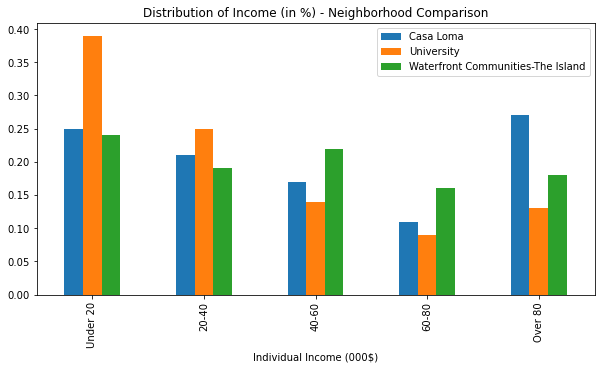

In [27]:
df_income_percent_grouped.plot(x='Individual Income (000$)', kind='bar', stacked=False,
                              title='Distribution of Income (in %) - Neighborhood Comparison', figsize=(10,5), width=0.5)

### Population Pyramid

In [36]:
casa_loma_women = pd.DataFrame(df_age_women['Casa Loma'])
casa_loma_women = casa_loma_women.rename(columns={'Casa Loma':'Females'})
casa_loma_men = pd.DataFrame(df_age_men['Casa Loma'])
casa_loma_men = casa_loma_men.rename(columns={'Casa Loma':'Males'})
casa_loma_men = casa_loma_men.reset_index()

casa_loma = casa_loma_women
casa_loma = casa_loma.reset_index()
casa_loma['Males'] = casa_loma_men['Males']
casa_loma.head()

,Characteristic,Females,Males
0,0 to 04 years,165,185
1,05 to 09 years,190,210
2,10 to 14 years,230,225
3,15 to 19 years,220,230
4,20 to 24 years,330,295


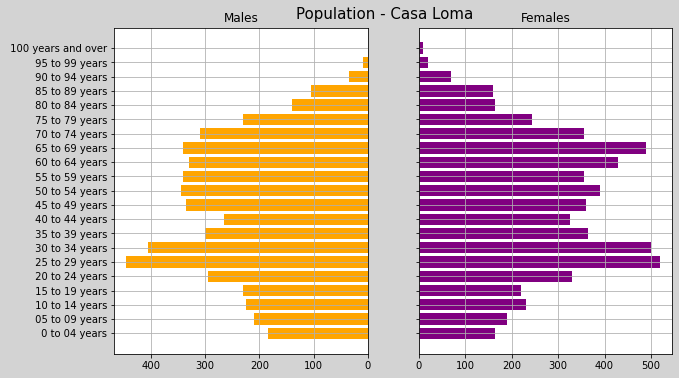

In [37]:
y = range(0, len(casa_loma))
x_males = casa_loma['Males']
x_females = casa_loma['Females']
fig,axes = plt.subplots(ncols=2, sharey=True, figsize=(10,6))
fig.patch.set_facecolor('lightgrey')
plt.figtext(.5,.9, 'Population - Casa Loma', fontsize=15, ha='center')
axes[0].barh(y,x_males, align='center', color='orange')
axes[0].set(title = 'Males')
axes[1].barh(y,x_females, align='center', color='purple')
axes[1].set(title = 'Females')
axes[1].grid()
axes[0].set(yticks = y, yticklabels=casa_loma['Characteristic'])
axes[0].invert_xaxis()
axes[0].grid()
plt1=plt.show()


In [38]:
university_women = pd.DataFrame(df_age_women['University'])
university_women = university_women.rename(columns={'University':'Females'})
university_men = pd.DataFrame(df_age_men['University'])
university_men = university_men.rename(columns={'University':'Males'})
university_men = university_men.reset_index()

university = university_women
university = university.reset_index()
university['Males'] = university_men['Males']
university.head()

,Characteristic,Females,Males
0,0 to 04 years,110,115
1,05 to 09 years,95,85
2,10 to 14 years,80,85
3,15 to 19 years,160,170
4,20 to 24 years,560,590


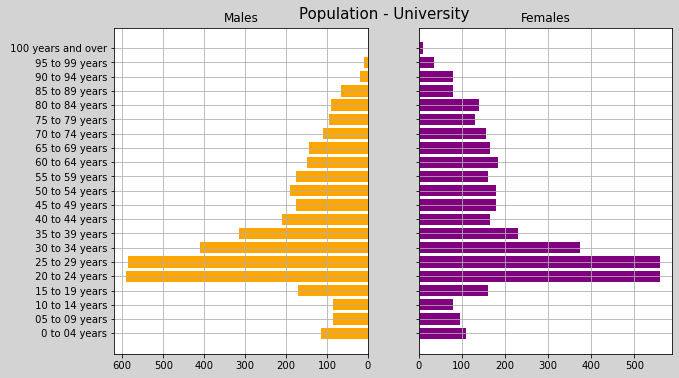

In [39]:
y = range(0, len(university))
x_males = university['Males']
x_females = university['Females']
fig,axes = plt.subplots(ncols=2, sharey=True, figsize=(10,6))
fig.patch.set_facecolor('lightgrey')
plt.figtext(.5,.9, 'Population - University', fontsize=15, ha='center')
axes[0].barh(y,x_males, align='center', color='orange')
axes[0].set(title = 'Males')
axes[1].barh(y,x_females, align='center', color='purple')
axes[1].set(title = 'Females')
axes[1].grid()
axes[0].set(yticks = y, yticklabels=university['Characteristic'])
axes[0].invert_xaxis()
axes[0].grid()
plt1=plt.show()

In [40]:
waterfront_women = pd.DataFrame(df_age_women['Waterfront Communities-The Island'])
waterfront_women = waterfront_women.rename(columns={'Waterfront Communities-The Island':'Females'})
waterfront_men = pd.DataFrame(df_age_men['Waterfront Communities-The Island'])
waterfront_men = waterfront_men.rename(columns={'Waterfront Communities-The Island':'Males'})
waterfront_men = waterfront_men.reset_index()

waterfront = waterfront_women
waterfront = waterfront.reset_index()
waterfront['Males'] = waterfront_men['Males']
waterfront.head()

,Characteristic,Females,Males
0,0 to 04 years,1050,1080
1,05 to 09 years,455,465
2,10 to 14 years,315,285
3,15 to 19 years,555,570
4,20 to 24 years,3590,3100


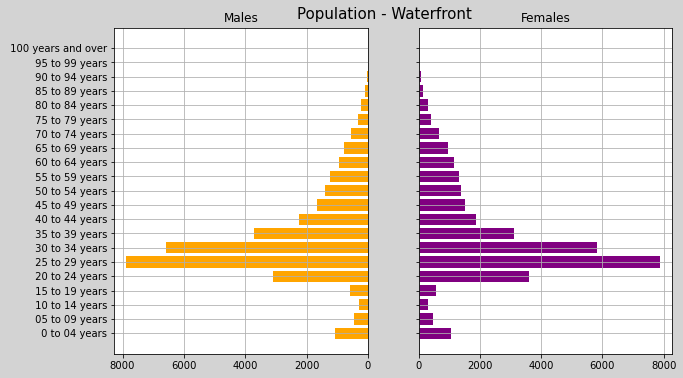

In [41]:
y = range(0, len(waterfront))
x_males = waterfront['Males']
x_females = waterfront['Females']
fig,axes = plt.subplots(ncols=2, sharey=True, figsize=(10,6))
fig.patch.set_facecolor('lightgrey')
plt.figtext(.5,.9, 'Population - Waterfront', fontsize=15, ha='center')
axes[0].barh(y,x_males, align='center', color='orange')
axes[0].set(title = 'Males')
axes[1].barh(y,x_females, align='center', color='purple')
axes[1].set(title = 'Females')
axes[1].grid()
axes[0].set(yticks = y, yticklabels=waterfront['Characteristic'])
axes[0].invert_xaxis()
axes[0].grid()
plt1=plt.show()